In [3]:
from pylab import *
import numpy as np

def field_field_coherence(x,y,dt, trl_indx = None):

    if trl_indx is not None:
        x = x[trl_indx,:]
        y = y[trl_indx,:]
#    print(x.shape)
        
    T = x.shape[0]    
    N = x.shape[1] 
    
    #generating arrays
    SYY = np.zeros(int(N/2+1))                            
    SXX = np.zeros(int(N/2+1))                        
    SYX = np.zeros(int(N/2+1), dtype=complex)           

    #loop over trials
    for k in range(T):                                

        yf = rfft((y[k,:]-np.mean(y[k,:])) *hanning(N))   #rfft of y 
        nf = rfft((x[k,:]-np.mean(x[k,:])) *hanning(N))   #rfft of x
        SYY = SYY + ( real( yf*conj(yf) ) )/T       #this appends power spectra (for y) for this trial
        SXX = SXX + ( real( nf*conj(nf) ) )/T           # ""  for x
        SYX = SYX + ( yf*conj(nf)   )/T     # "" xy

    coh = abs(SYX) / np.sqrt(SYY) / np.sqrt(SXX)            
    f = rfftfreq(N, dt)
    
    return coh, f   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
import gc
from scipy.stats import zscore
import copy
from scipy.integrate import simpson as simps
from scipy.ndimage import gaussian_filter1d

def smooth_with_gaussian(data, sigma=3):
    return gaussian_filter1d(data, sigma=sigma, axis=1) 
sigma = 2

def preprocess(data):
    stds = np.std(data[:, :], axis=0)
    non_constant_cols = stds > 1e-6
    if len(non_constant_cols) != 0:
        print('non constant column at ', np.where(non_constant_cols == False))
                

    constant_cols = stds < 1e-6

    z = np.zeros_like(data[:, :])
    z[:, non_constant_cols] = zscore(data[:, non_constant_cols], axis=0)
    z[:, constant_cols] = np.mean(data[:, constant_cols], axis = 0)

    #unsure what to replace lost values with, for now replacing with 0

    if np.isnan(z).any():
        raise ValueError("Data contains NaN values after normalization.")

    return z

def sample_plots(l_al, r_al, a_al, l_ar, r_ar, a_ar, width, height):
    #plotting some traces
    fig, ax = plt.subplots(1, 2, figsize=(width, height))
    ax[0].plot(np.mean(l_al, axis = 0), label = 'left')
    ax[0].plot(np.mean(r_al, axis = 0), label = 'right')
    ax[0].plot(np.mean(a_al, axis = 0), label = 'attention')
    ax[0].set_title('attention left - mean across trials')
    ax[1].plot(np.mean(l_ar, axis = 0), label = 'left')
    ax[1].plot(np.mean(r_ar, axis = 0), label = 'right')
    ax[1].plot(np.mean(a_ar, axis = 0), label = 'attention')
    ax[1].set_title('attention right - mean across trials')
    plt.legend()
    plt.show()

    plt.plot(np.mean(l_al, axis = 0), label = 'left input - attleft')
    plt.plot(-1 * np.mean(l_ar, axis = 0), label = 'negative of left input - attright')
    plt.title('mean of left attleft and negative of left attright')
    plt.legend()
    plt.show()

    fign, ax = plt.subplots(1, 2, figsize=(14, 7))
    ax[0].plot(l_al[0, :], label = 'left input - attleft')
    ax[0].plot(r_al[0, :], label = 'right input - attleft')
    ax[0].plot(a_al[0, :], label = 'attention - attleft')
    ax[0].set_title('trial 0 attleft data')
    ax[1].plot(l_ar[0, :], label = 'left input - attright')
    ax[1].plot(r_ar[0, :], label = 'right input - attright')
    ax[1].plot(a_ar[0, :], label = 'attention - attright')
    ax[1].set_title('trial 0 attright data')
    plt.legend()
    plt.show()

Dataset 1 loaded in 15.19 seconds
non constant column at  (array([], dtype=int64),)
non constant column at  (array([], dtype=int64),)
non constant column at  (array([], dtype=int64),)


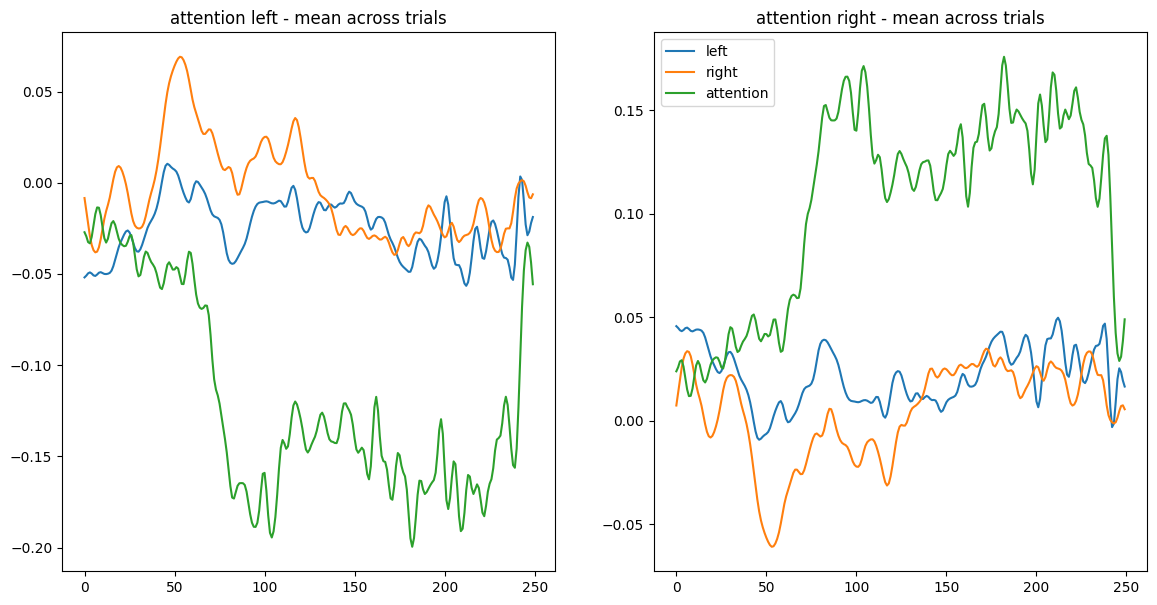

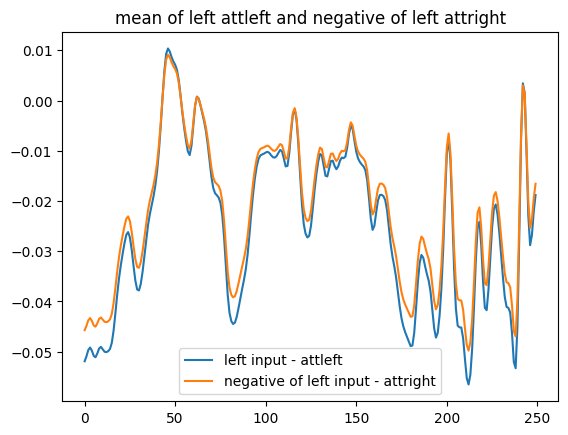

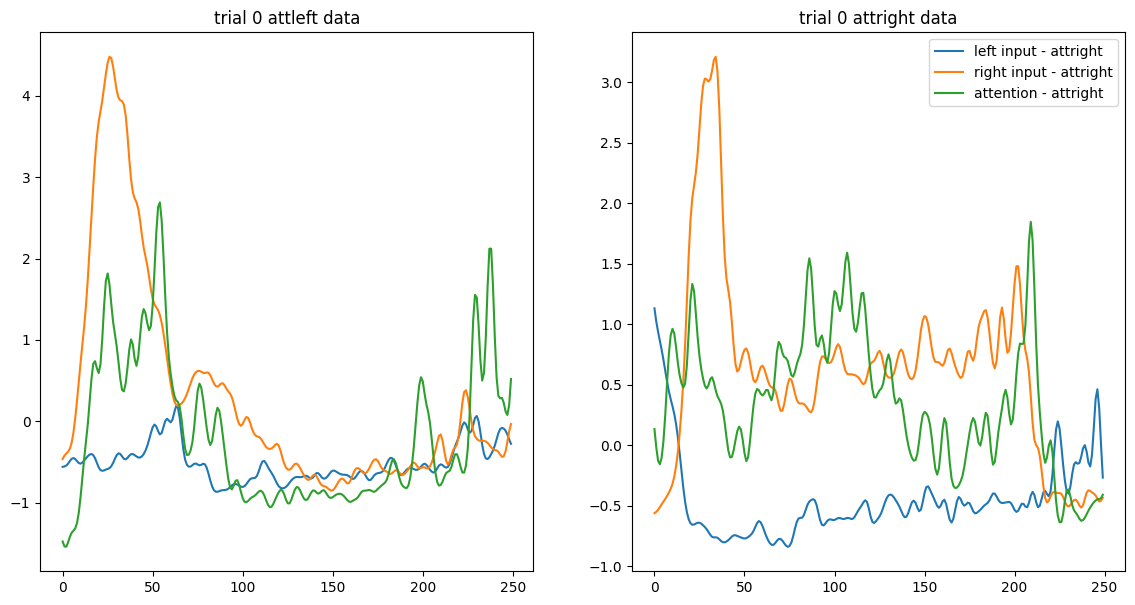

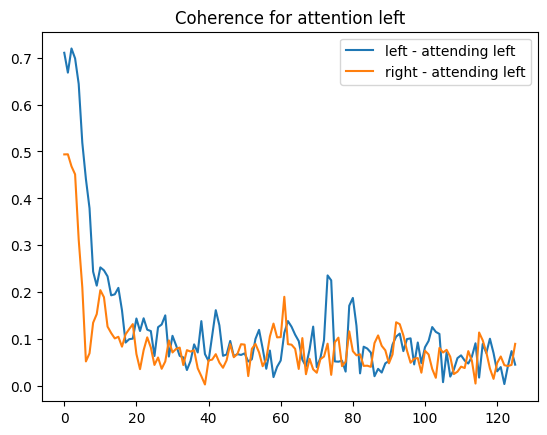

Dataset 1 complete in 30.137017250061035
Dataset 2 loaded in 10.21 seconds
non constant column at  (array([], dtype=int64),)
non constant column at  (array([], dtype=int64),)
non constant column at  (array([0, 1, 2]),)


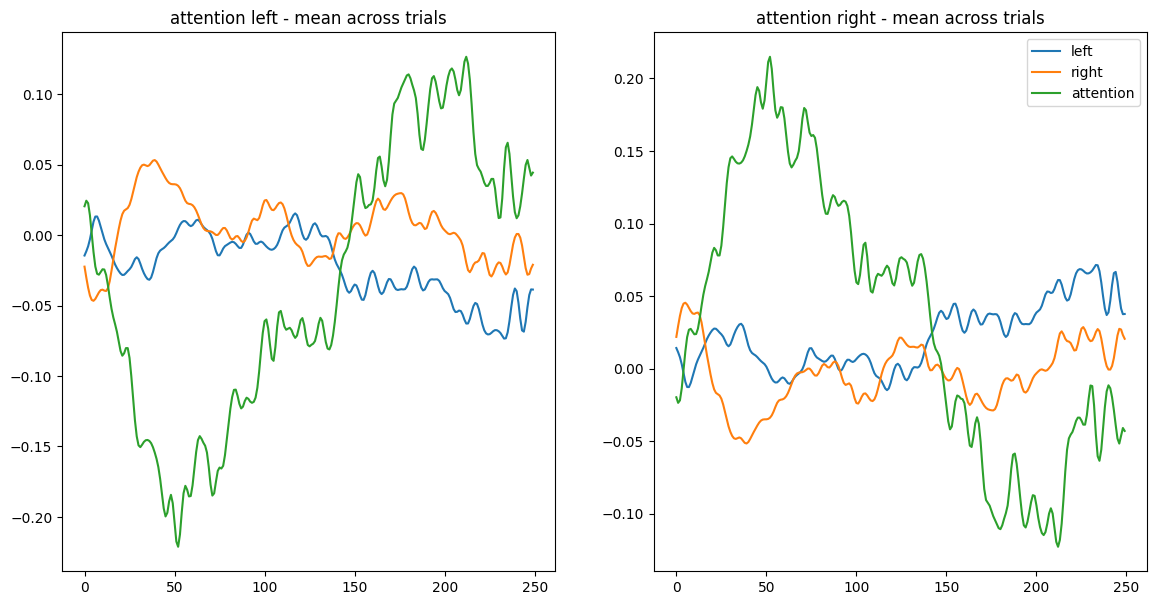

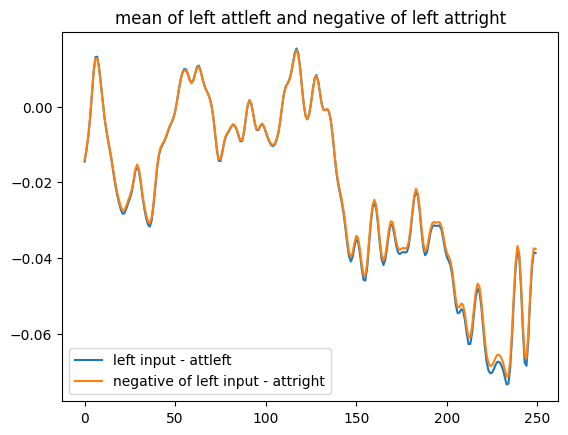

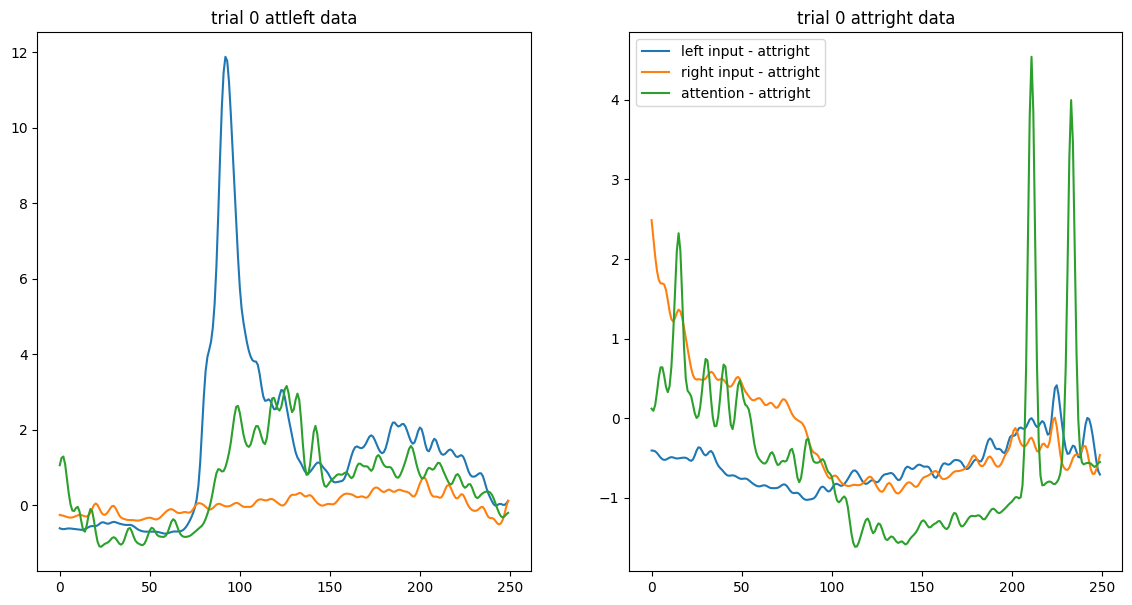

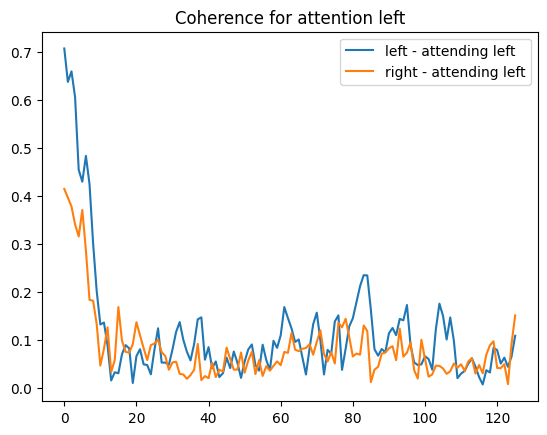

Dataset 2 complete in 26.269554615020752
Dataset 4 loaded in 19.24 seconds
non constant column at  (array([], dtype=int64),)
non constant column at  (array([], dtype=int64),)
non constant column at  (array([0]),)


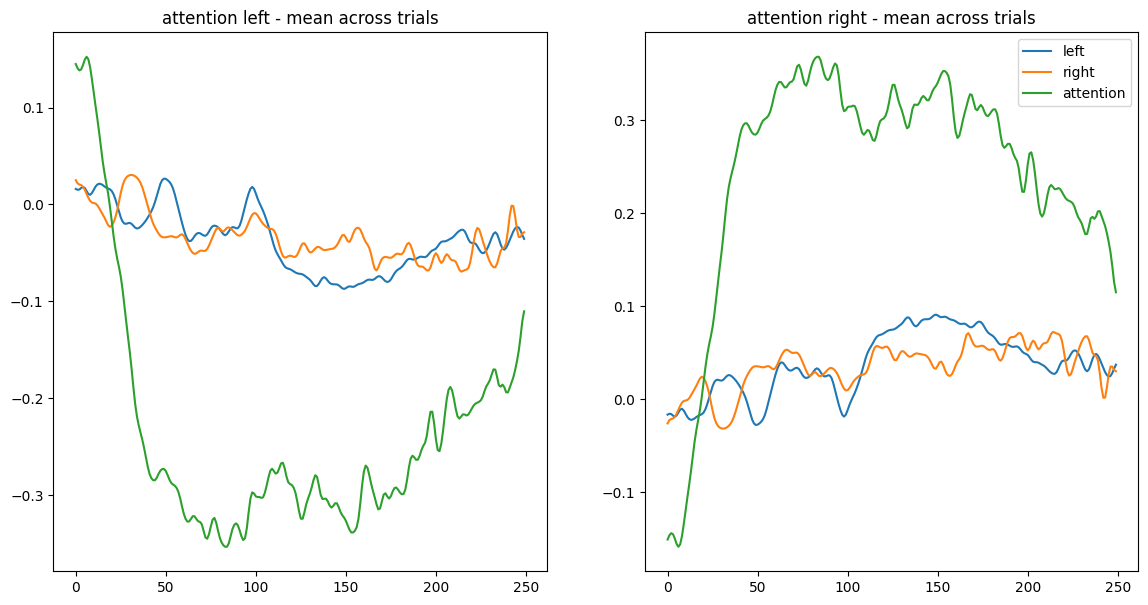

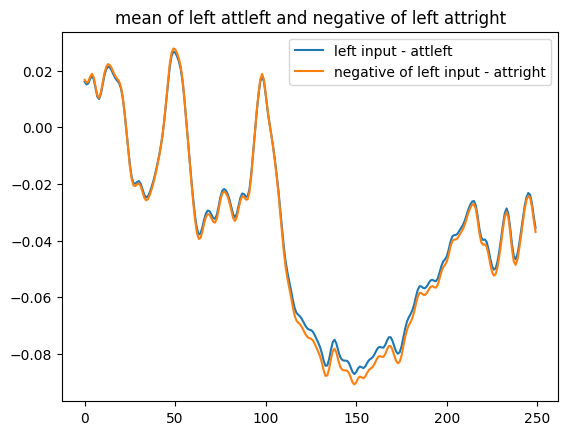

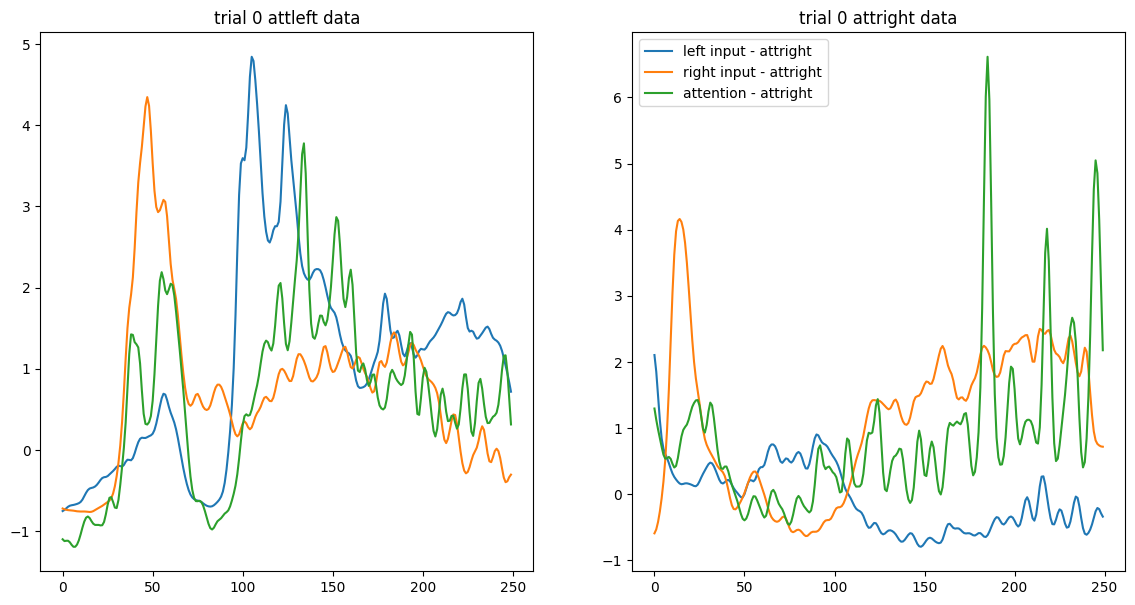

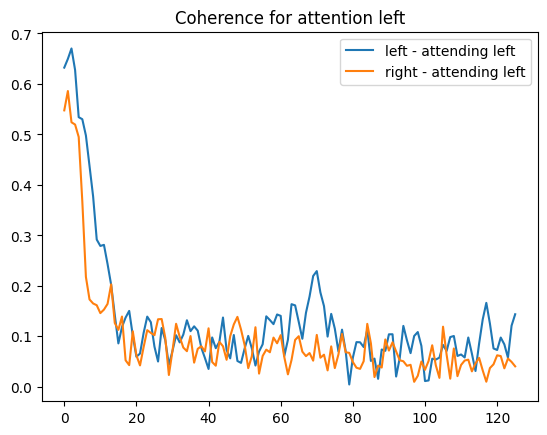

Dataset 4 complete in 37.448506593704224
Dataset 8 loaded in 11.12 seconds
non constant column at  (array([], dtype=int64),)
non constant column at  (array([], dtype=int64),)
non constant column at  (array([0, 1]),)


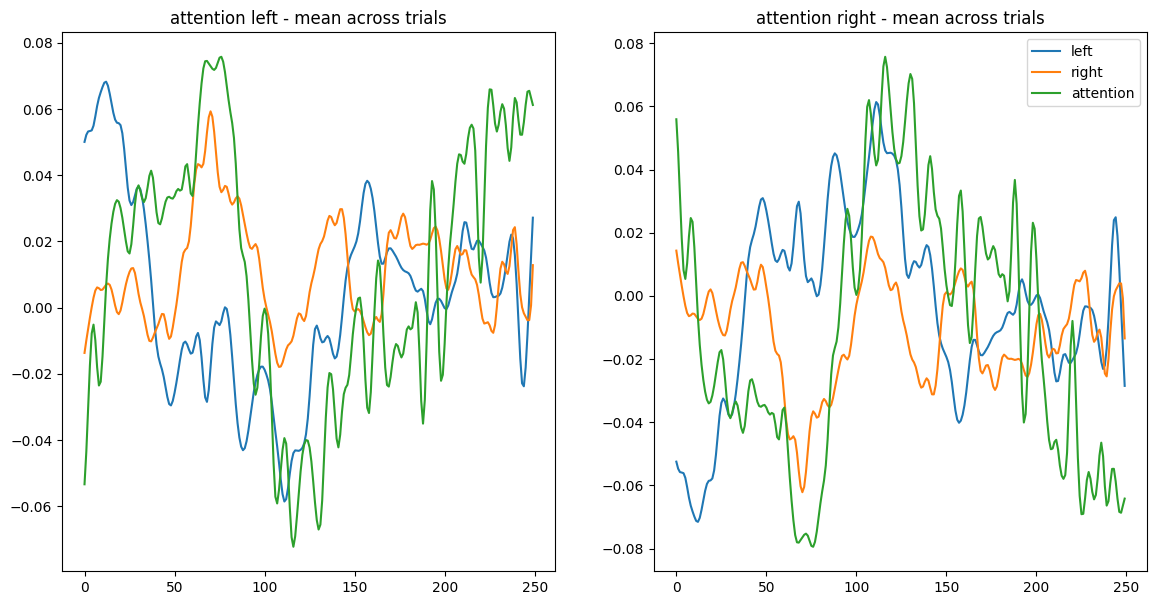

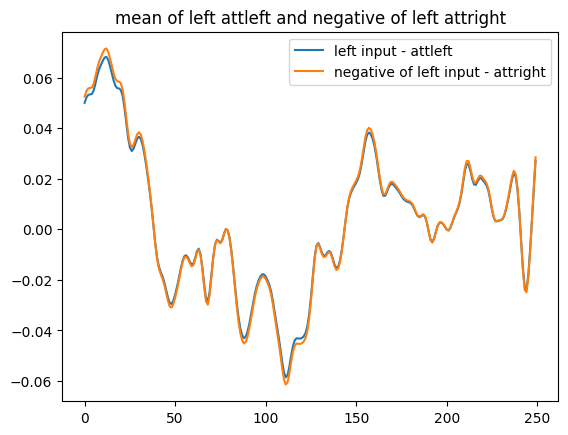

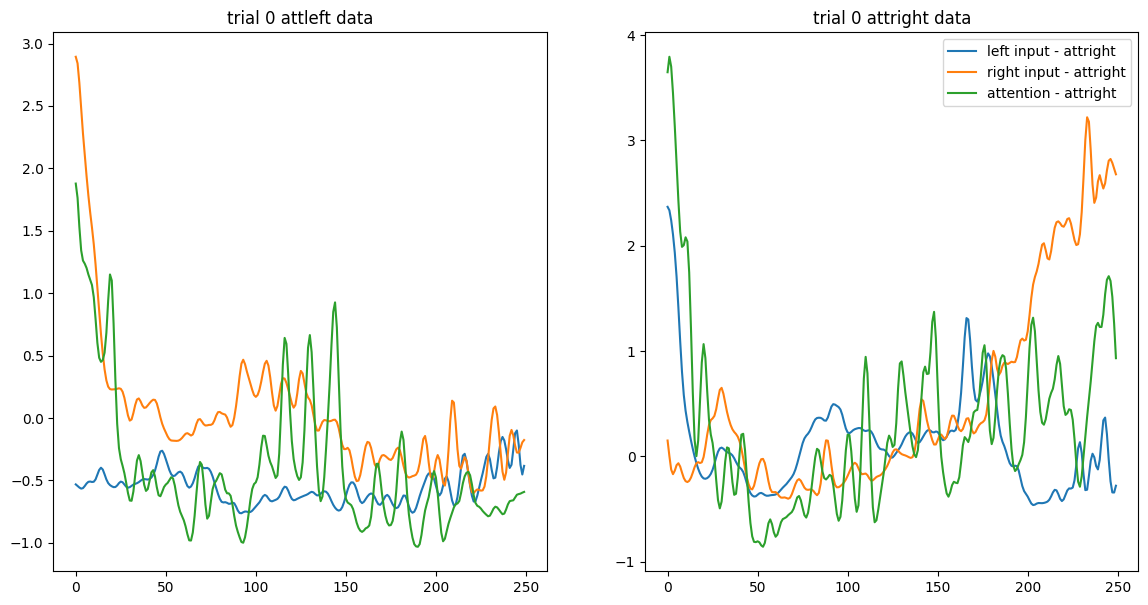

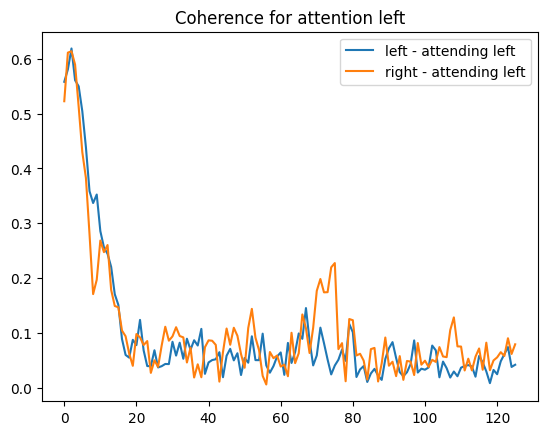

Dataset 8 complete in 27.205333948135376
Dataset 14 loaded in 13.29 seconds
non constant column at  (array([], dtype=int64),)
non constant column at  (array([], dtype=int64),)
non constant column at  (array([0, 1, 2]),)


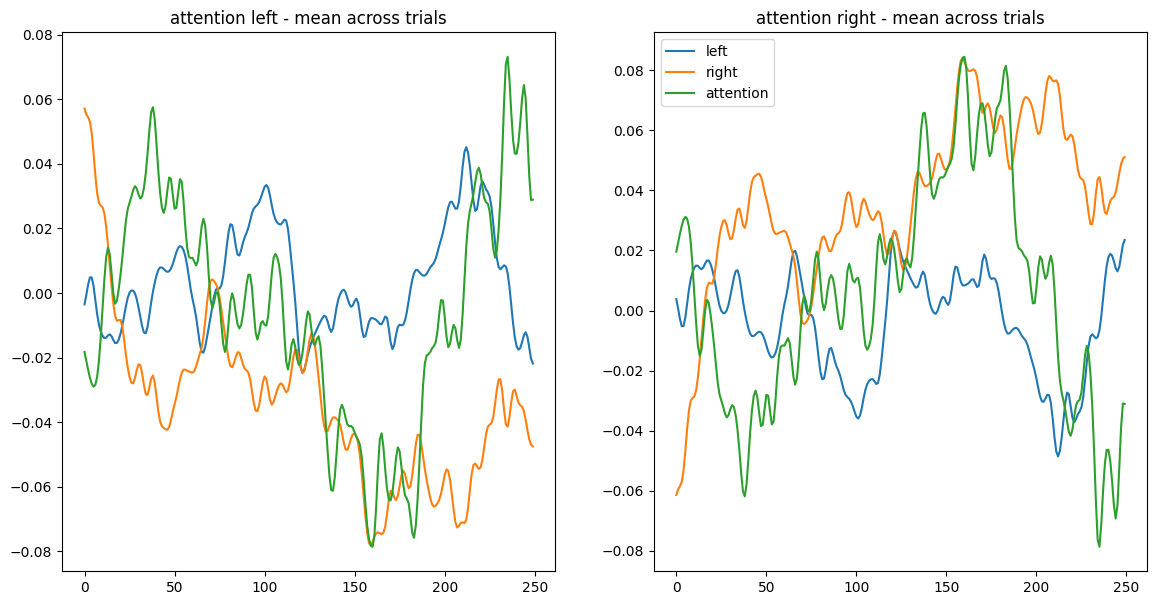

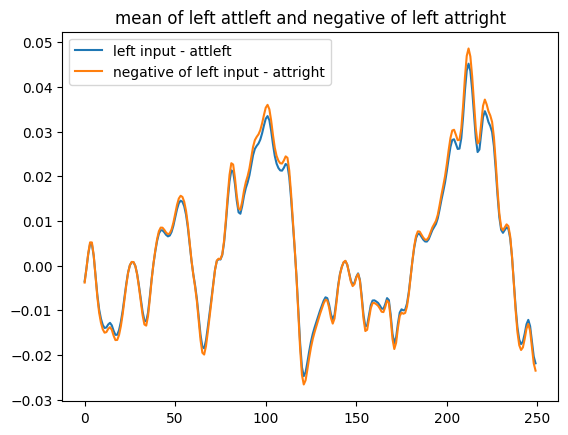

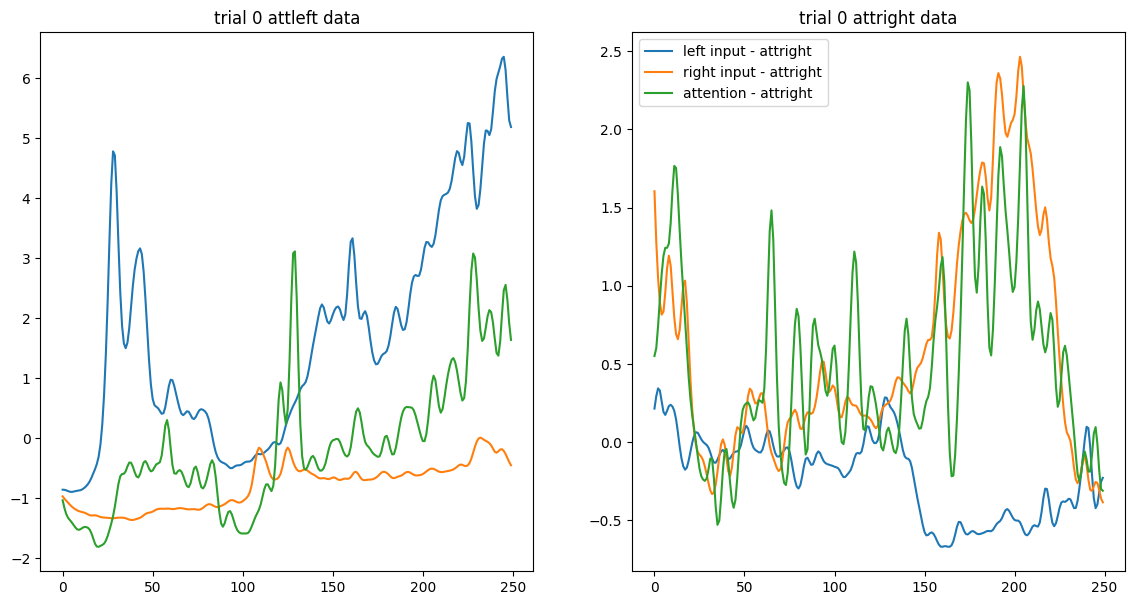

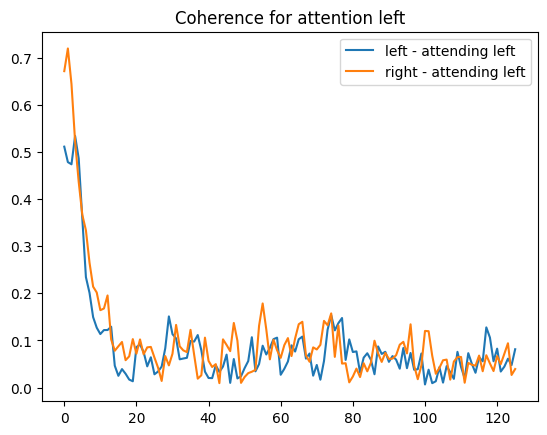

Dataset 14 complete in 30.649352073669434
Dataset 15 loaded in 15.77 seconds
non constant column at  (array([], dtype=int64),)
non constant column at  (array([], dtype=int64),)
non constant column at  (array([0]),)


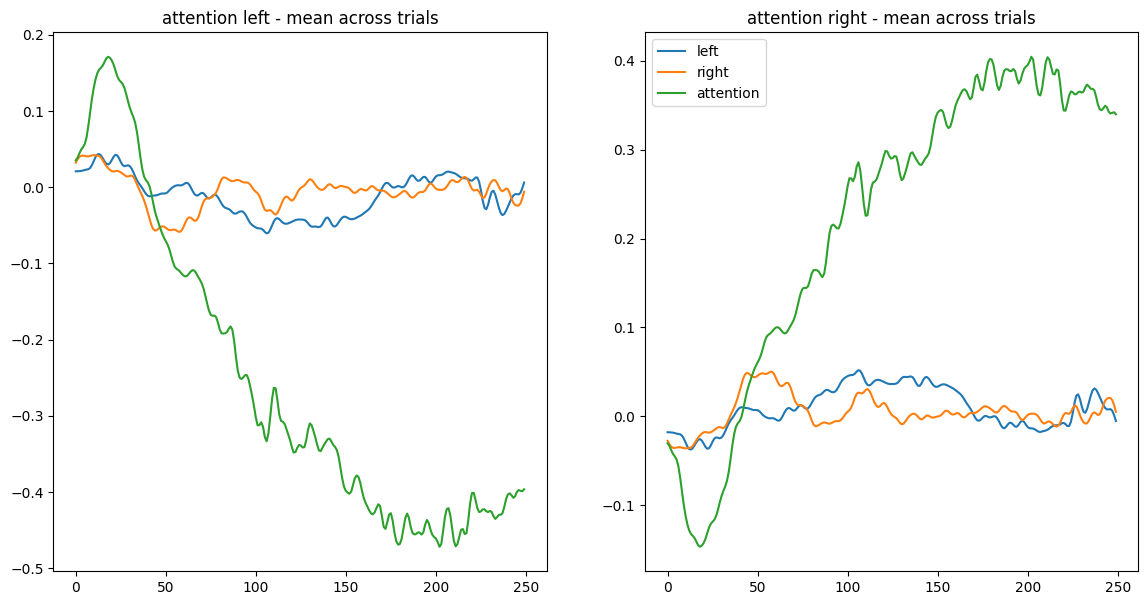

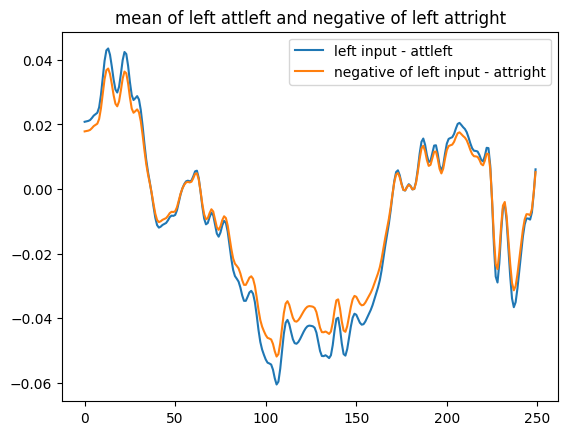

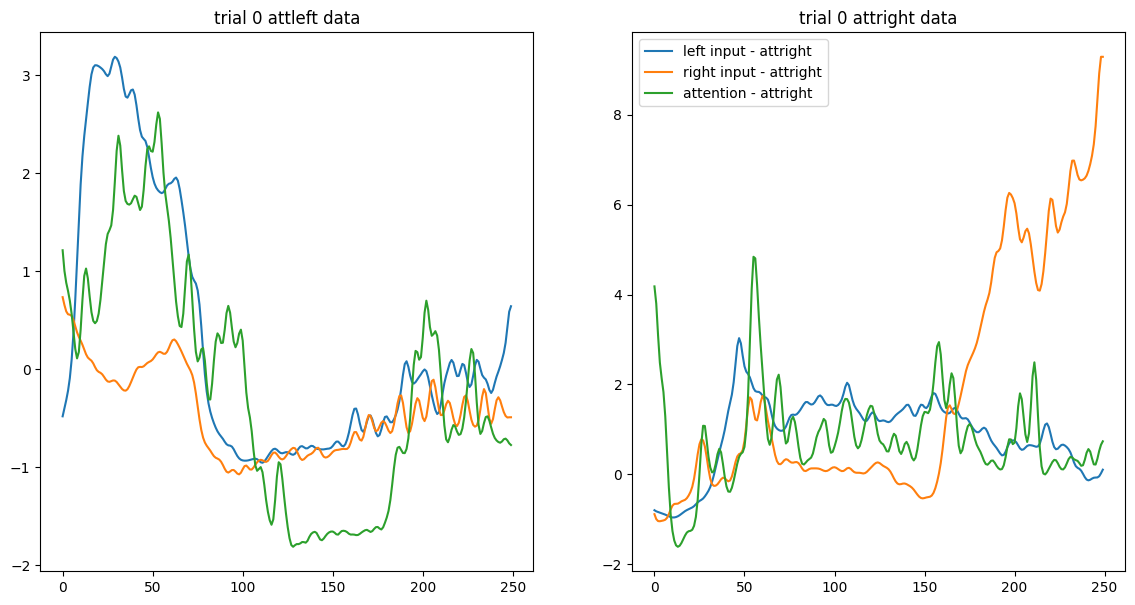

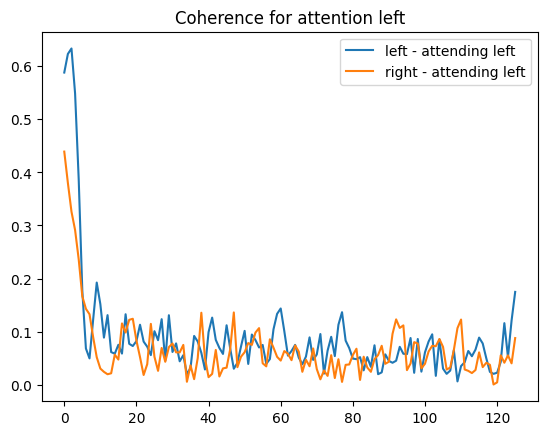

Dataset 15 complete in 33.41250705718994
Dataset 20 loaded in 20.61 seconds
non constant column at  (array([], dtype=int64),)
non constant column at  (array([], dtype=int64),)
non constant column at  (array([0]),)


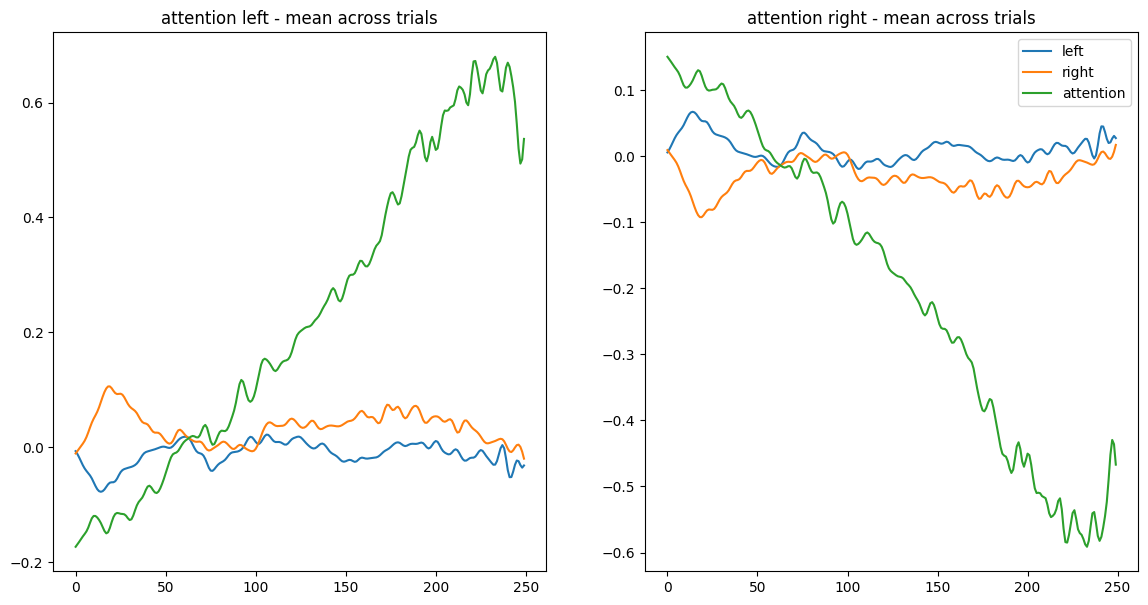

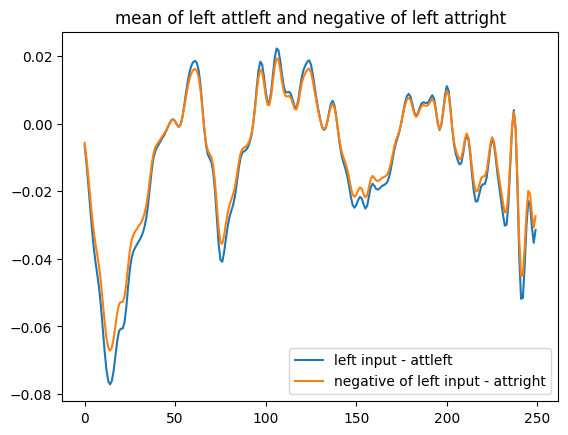

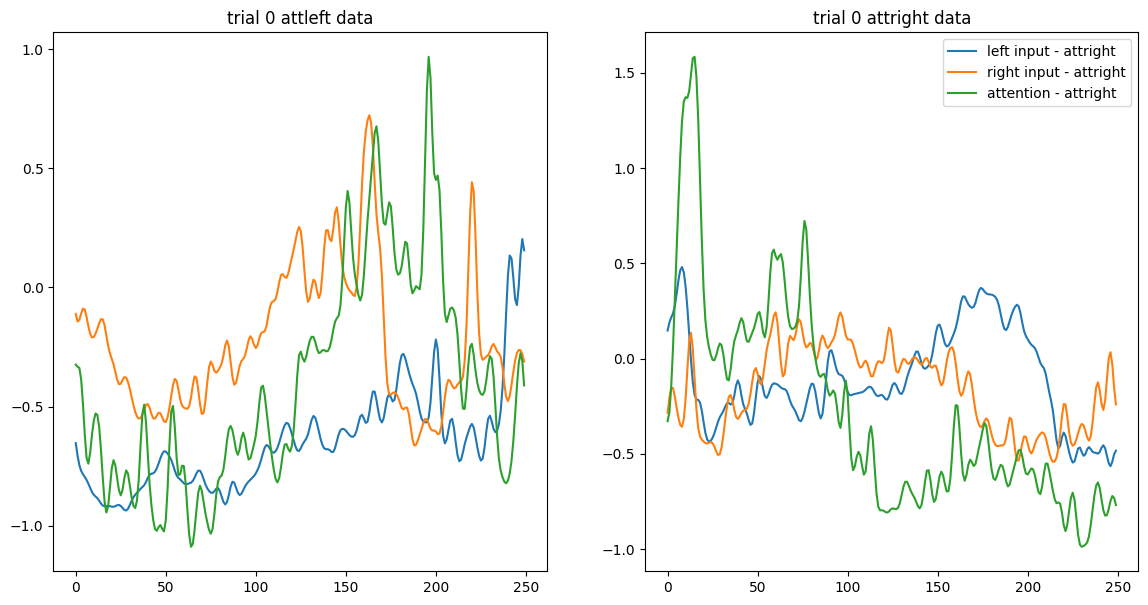

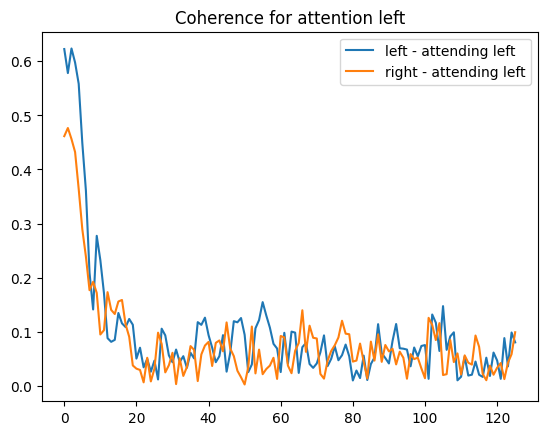

Dataset 20 complete in 36.4293737411499
Dataset 23 loaded in 7.21 seconds
non constant column at  (array([], dtype=int64),)
non constant column at  (array([], dtype=int64),)
non constant column at  (array([], dtype=int64),)


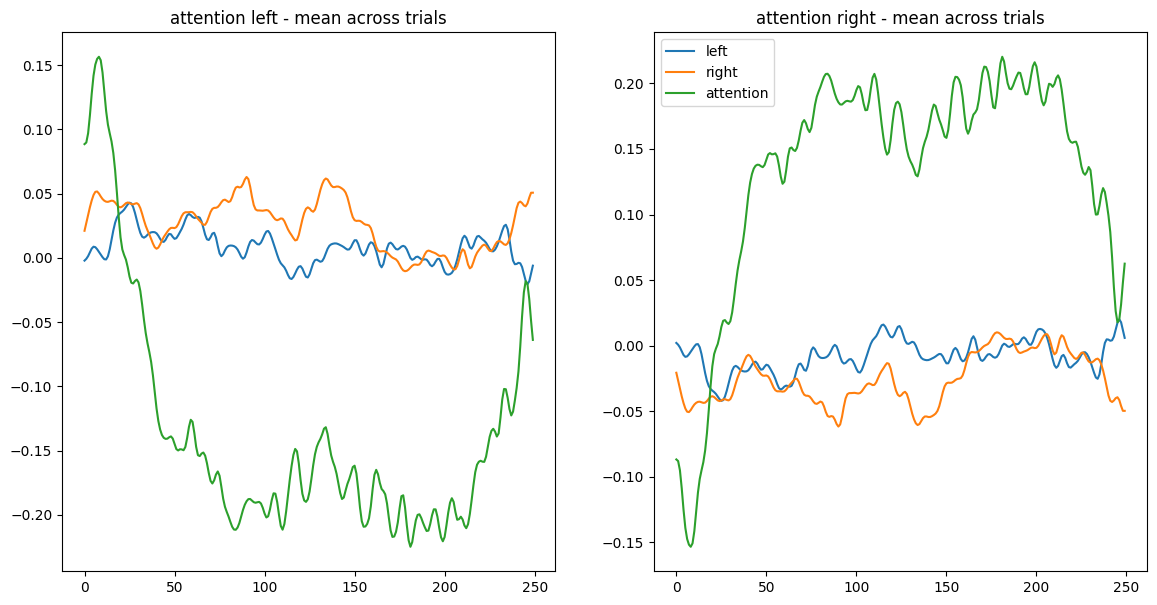

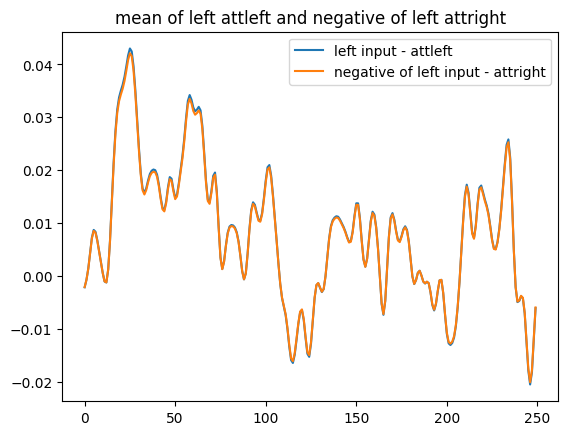

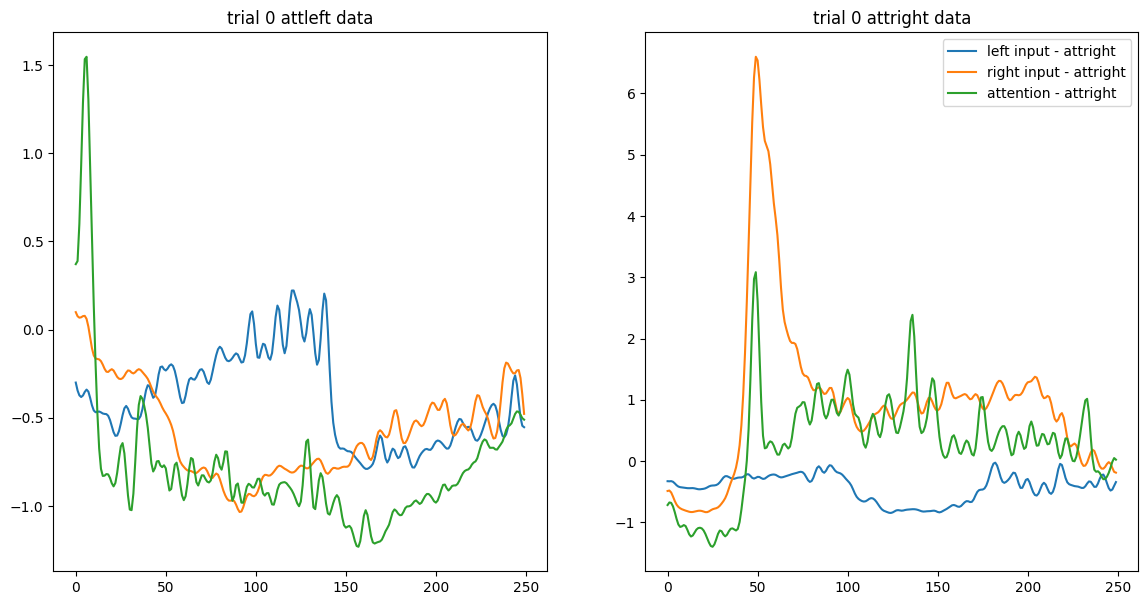

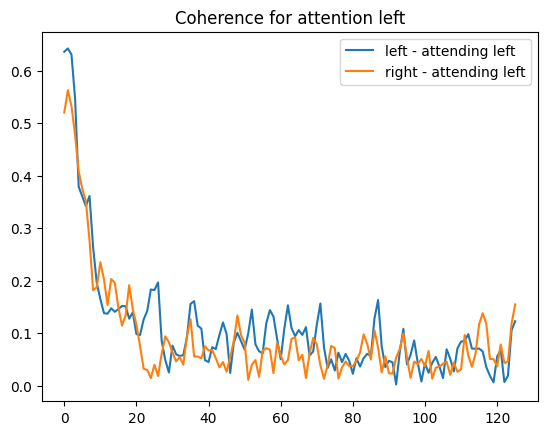

Dataset 23 complete in 23.120429754257202
total time elapsed = 244.68112874031067
{'dataset_1': {'delta': {'left_attleft': np.float64(1.3786920507752987), 'right_attleft': np.float64(0.9877291697208849), 'left_attright': np.float64(0.9814094271789826), 'right_attright': np.float64(1.2908193700872224)}, 'theta': {'left_attleft': np.float64(1.4182119210438549), 'right_attleft': np.float64(0.91965046458645), 'left_attright': np.float64(0.9337674512347822), 'right_attright': np.float64(0.9953749322717497)}, 'alpha': {'left_attleft': np.float64(2.1065051651804083), 'right_attleft': np.float64(0.8033157958335201), 'left_attright': np.float64(1.4179164284743297), 'right_attright': np.float64(1.4669057074913572)}, 'beta': {'left_attleft': np.float64(3.3232771229508926), 'right_attleft': np.float64(2.0323609241657756), 'left_attright': np.float64(3.2047231733076718), 'right_attright': np.float64(1.5483641974090507)}, 'gamma': {'left_attleft': np.float64(5.123867687231204), 'right_attleft': np.f

In [5]:
file_numbers = [1, 2, 4, 8, 14, 15, 20, 23]

structure = {f'dataset_{file_number}': {f'{band}': {
    'left_attleft': [],
    'right_attleft': [],
    'left_attright': [],
    'right_attright': []
} for band in bands} for file_number in file_numbers} 

coherence_results = copy.deepcopy(structure)
Norm = copy.deepcopy(structure)


dt = 0.002
bands = ['delta', 'theta', 'alpha', 'beta', 'gamma']   #for coherence I have looked at the mean valuee for these bands
freq_ranges = [(0, 4), (4, 8), (8, 13), (13, 30), (30, 80)]  # Actual frequency ranges

def coherence_auc(data, condition, freq):
   for band, (fmin, fmax) in zip(bands, freq_ranges):
        band_idx = (freq >= fmin) & (freq < fmax)
        all_idx = freq < 80

        coherence_results[f'dataset_{file_number}'][band][f'{condition}'] = simps(data[band_idx], freq[band_idx])
        Norm[f'dataset_{file_number}'][band][f'{condition}']  = simps(data[all_idx], freq[all_idx])
      

total_time = time.time()
for file_number in  file_numbers:
    file_total = time.time()
    file_path = f'C:/Users/joshu/PartIIIProject/RSNNdale_attention_{file_number}_attention_test'
    load_data_start_time = time.time()
    data = pickle.load(open(file_path, 'rb'))
    elapsed_time = time.time() - load_data_start_time
    print(f"Dataset {file_number} loaded in {elapsed_time:.2f} seconds")

    attention_labels = data['label_attend'][0]
    label_left = data['label_left'][0]
    label_right = data['label_right'][0]
    attend_01 = data['attend'][0]
    omitted = data['omit'][0]
    relevant = np.where(omitted ==0)[0]

    left_input_SP = data['SP'][0][0][relevant]
    right_input_SP = data['SP'][0][1][relevant]
    attention_SP = data['SP'][0][2][relevant]

    sigma = 2

    left_sm = smooth_with_gaussian(left_input_SP, sigma=sigma) 
    right_sm = smooth_with_gaussian(right_input_SP, sigma=sigma) 
    att_sm = smooth_with_gaussian(attention_SP, sigma=sigma) 

    num_trials, num_samples, num_neurons = left_input_SP.shape
    num_neurons_attention = 80

    for j in range(0, num_trials):
        for i in range(0, num_neurons):
            count_left = np.count_nonzero(left_input_SP[j, :, i] == 1)
            if count_left > 0:
                left_sm[j, :, i] /= count_left
            count_right = np.count_nonzero(right_input_SP[j, :, i] == 1)
            if count_right > 0:
                right_sm[j, :, i] /= count_right


        for i in range(0, num_neurons_attention):
            count_attention = np.count_nonzero(attention_SP[j, :, i] == 1)
            if count_attention > 0:
                att_sm[j, :, i] /= count_attention


    left_input_SP = np.sum(left_sm, axis=2)
    right_input_SP = np.sum(right_sm, axis=2)
    attention_SP = np.sum(att_sm, axis=2)

    left_input_SP = preprocess(left_input_SP)
    right_input_SP = preprocess(right_input_SP)
    attention_SP = preprocess(attention_SP)

    #preprocess here now that we have traces of all of the relavant trials
    left_indices_agg = np.where((omitted ==0) & (attend_01 == 0))[0]  #indices of agg where left
    _, left_indices, _ = np.intersect1d(relevant, left_indices_agg, return_indices = True)   #indices for relevant processed data where attention left
    right_indices_agg = np.where((omitted ==0) & (attend_01 == 1))[0]
    _, right_indices, _ = np.intersect1d(relevant, right_indices_agg, return_indices = True)

  
    #splitting left and right
    left_input_SP_attleft = left_input_SP[left_indices, 100:350]
    right_input_SP_attleft = right_input_SP[left_indices, 100:350]
    attention_SP_attleft = attention_SP[left_indices, 100:350]

    left_input_SP_attright = left_input_SP[right_indices, 100:350]
    right_input_SP_attright = right_input_SP[right_indices, 100:350]
    attention_SP_attright = attention_SP[right_indices, 100:350]

    #some plots --------
    sample_plots(left_input_SP_attleft, right_input_SP_attleft,
                  attention_SP_attleft, left_input_SP_attright,
                    right_input_SP_attright, attention_SP_attright, 14, 7)

   
    #----- computing coherence ----------------
    left_attleft_coherence, freq_lal = field_field_coherence(
        left_input_SP_attleft, attention_SP_attleft, dt)
    right_attleft_coherence, freq_ral = field_field_coherence(
        right_input_SP_attleft, attention_SP_attleft, dt)
    left_attright_coherence, freq_lar = field_field_coherence(
        left_input_SP_attright, attention_SP_attright, dt)
    right_attright_coherence, freq_rar = field_field_coherence(
        right_input_SP_attright, attention_SP_attright, dt)

    plt.plot(left_attleft_coherence, label = 'left - attending left')
    plt.plot(right_attleft_coherence, label = 'right - attending left')
    plt.legend()
    plt.title('Coherence for attention left')
    plt.show()
      
    coh_structure = {f'{band}': [] for band in bands}
    left_attleft_coherence_bands = copy.deepcopy(coh_structure)
    right_attleft_coherence_bands = copy.deepcopy(coh_structure)
    left_attright_coherence_bands = copy.deepcopy(coh_structure)
    right_attright_coherence_bands = copy.deepcopy(coh_structure)
        
    coherence_auc(left_attleft_coherence, 'left_attleft', freq_lal)
    coherence_auc(right_attleft_coherence, 'right_attleft', freq_ral)
    coherence_auc(left_attright_coherence, 'left_attright', freq_lar)
    coherence_auc(right_attright_coherence, 'right_attright', freq_rar)

    del left_input_SP_attleft, right_input_SP_attleft, attention_SP_attleft, left_input_SP_attright, right_input_SP_attright, attention_SP_attright
    gc.collect()
    del(data)
    gc.collect()
    print(f'Dataset {file_number} complete in', time.time() - file_total)

print('total time elapsed =', time.time() - total_time)
print(coherence_results)


{'left_attleft': np.float64(1.3786920507752987), 'right_attleft': np.float64(0.9877291697208849), 'left_attright': np.float64(0.9814094271789826), 'right_attright': np.float64(1.2908193700872224)}
{'left_attleft': np.float64(1.3463628319637553), 'right_attleft': np.float64(0.8125188881254316), 'left_attright': np.float64(1.2048106652253963), 'right_attright': np.float64(1.233096383250571)}
{'left_attleft': np.float64(1.2818455998860139), 'right_attleft': np.float64(1.1334272026794916), 'left_attright': np.float64(1.1620939240999593), 'right_attright': np.float64(1.109266866380473)}
{'left_attleft': np.float64(1.1385271402841504), 'right_attleft': np.float64(1.1337137885768835), 'left_attright': np.float64(0.9670023629343133), 'right_attright': np.float64(1.2319517489214709)}
{'left_attleft': np.float64(0.9897520086953027), 'right_attleft': np.float64(1.391126251863328), 'left_attright': np.float64(0.931772476841724), 'right_attright': np.float64(1.4596777445157028)}
{'left_attleft': np

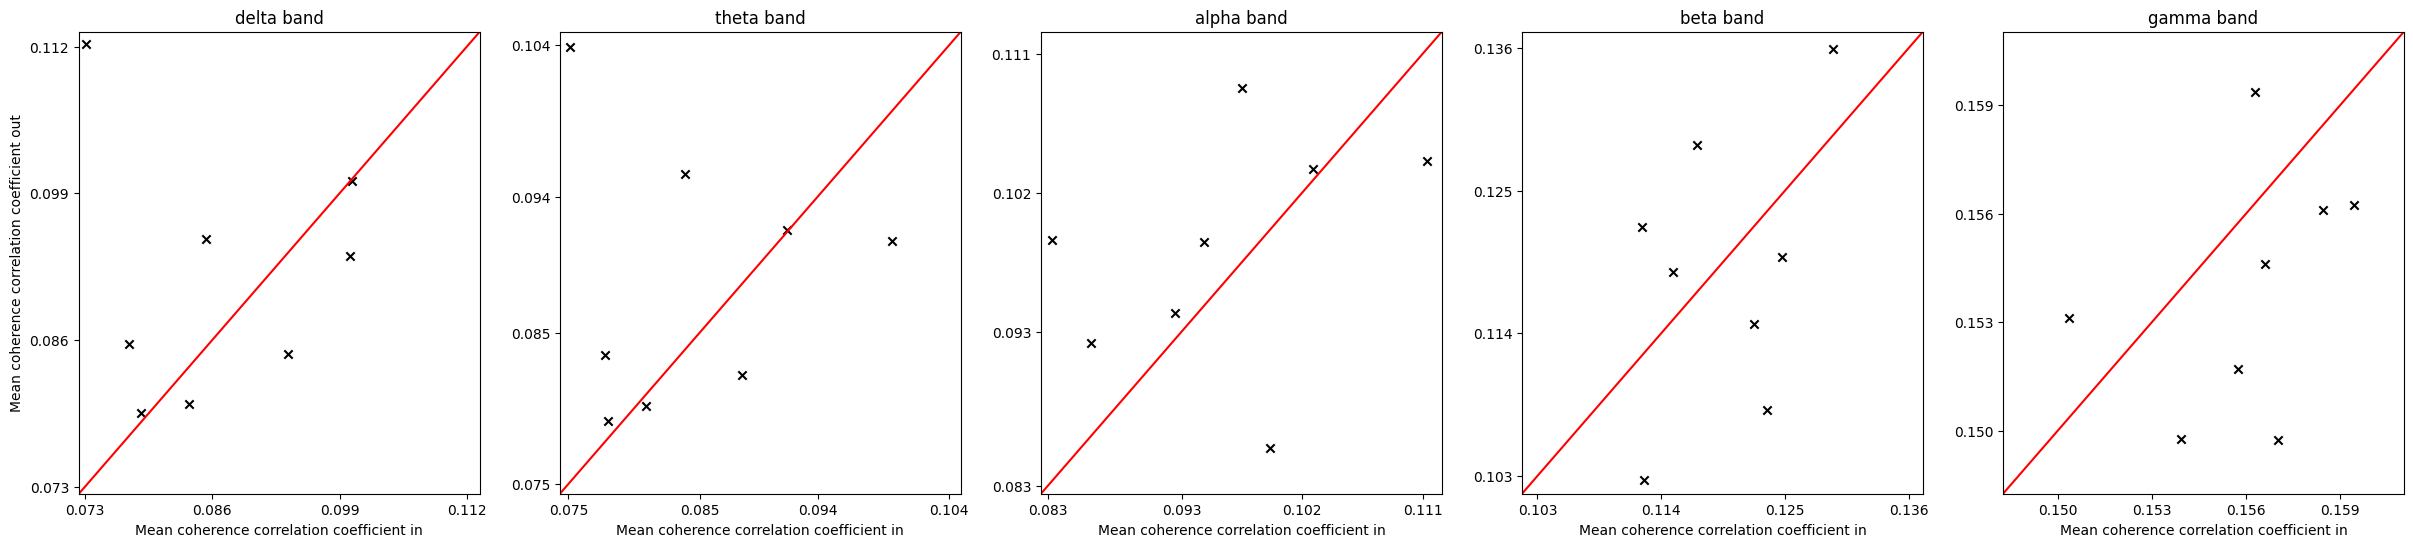

In [6]:
#want a single plot, where for each dataset, mean coherence in and mean coherence out are plotted with error bars
coherence_in = {f'{band}': [] for band in bands}
coherence_out = {f'{band}': [] for band in bands}

for file_number in file_numbers:
    values = []
    errors = []
    for band in bands:
        for condition in ['left_attleft', 'right_attright']:
            values.append(coherence_results[f'dataset_{file_number}'][band][condition] / Norm[f'dataset_{file_number}'][band][condition])
        coherence_in[f'{band}'].append(np.mean(values))

for file_number in file_numbers:
    print(coherence_results[f'dataset_{file_number}']['delta'])


    values = []
    errors = []
    for band in bands:
        for condition in ['left_attright', 'right_attleft']:
            values.append(coherence_results[f'dataset_{file_number}'][band][condition] / Norm[f'dataset_{file_number}'][band][condition])
        coherence_out[f'{band}'].append(np.mean(values))
    
max_values = {f'{band}': [] for band in bands}
min_values = {f'{band}': [] for band in bands}

idx = np.arange(len(file_numbers))
for band in bands:
    values = []
    for f in idx:
        values.append(coherence_in[f'{band}'][f])
        values.append(coherence_out[f'{band}'][f])
    print(values)
    max_values[f'{band}'].append(max(values))
    min_values[f'{band}'].append(min(values))

print(max_values)

fig, axs = plt.subplots(1,5, figsize=(30, 6))
for i, band in enumerate(bands):
    axs[i].scatter(coherence_in[f'{band}'], coherence_out[f'{band}'], marker='x', color='k')
    axs[i].plot([0, 1], [0, 1], transform=axs[i].transAxes, color='r')
    axs[i].set_xlim(min_values[f'{band}'][0]*(0.99), max_values[f'{band}'][0]*(1.01))
    axs[i].set_ylim(min_values[f'{band}'][0]*(0.99), max_values[f'{band}'][0]*(1.01))
    axs[i].set_xticks(np.round(np.linspace(min_values[f'{band}'][0],max_values[f'{band}'][0], 4), 3))
    axs[i].set_yticks(np.round(np.linspace(min_values[f'{band}'][0],max_values[f'{band}'][0], 4), 3))
    axs[i].set_xlabel('Mean coherence correlation coefficient in')
    axs[0].set_ylabel('Mean coherence correlation coefficient out')
    axs[i].set_title(f'{band} band')
plt.show()
